# Data Clearning / Outlier Removal / Feature Engineering / Feature Selection

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../step_data/eda.csv')

In [4]:
 sns.set(rc={'figure.figsize':(11.7,8.27)})  ### setting seaborn style

* Again, we take a look on info for df

* We can see that we must impute missing values for Embarked, Age and Cabin

* Even though Cabin has a lot of missing values, it is probably due to the fact that they did not rent any....However, it could be that these missing values are indeed 'missing', so we cannot be sure about the origing of the NaN's here....So, we should proceed accordingly ( replace with a single value, 'Unknown' )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

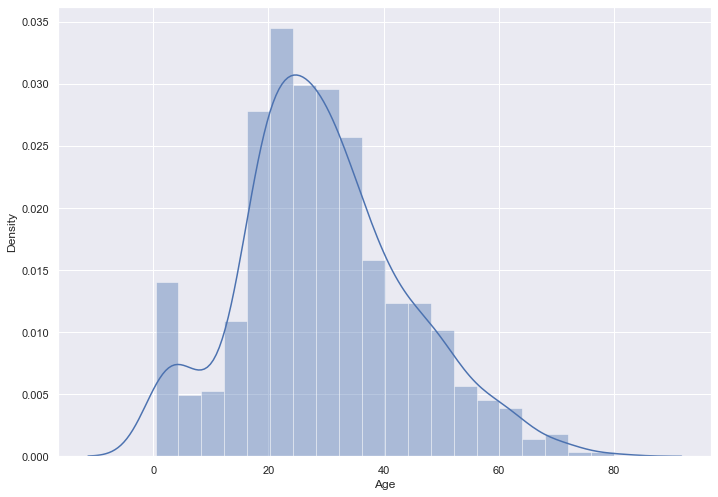

In [6]:
sns.distplot(df.loc[:,'Age'].dropna())

* The distribution is more or less Gaussian, so we might wanna Impute with the mean

* Before we do that, we will remove the guy that is 80 y.o., as he is probably an outlier

In [7]:
df = df.drop(df[df.Age==80].index)

df['Age'] = df.loc[:,'Age'].fillna(np.mean(df.loc[:,'Age']))

* We also take a look on info again to verify that Age has no missing values now

* We also verify that there are 890 rows now, since we dropped one

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        203 non-null    object 
 11  Embarked     888 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.4+ KB


### Embarked

* We need to impute for 2 people....We can afford checking them and see our best option

In [9]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
df.describe()  ### For Comparison

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,445.792135,0.383146,2.310112,29.628569,0.523596,0.382022,32.206685
std,257.423695,0.486427,0.835388,12.899321,1.103224,0.806409,49.721315
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,22.000000,0.000000,0.000000,7.903100
50%,445.500000,0.000000,3.000000,29.628569,0.000000,0.000000,14.454200
75%,668.750000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,74.000000,8.000000,6.000000,512.329200


* Ok, so their Fare is indeed extremely high ( more than 75% quantile, actually much more )

* They are both Pclass=1

* They survived

* Let us create some plots to make a decision

### Pclass vs embarked for NaN imputation

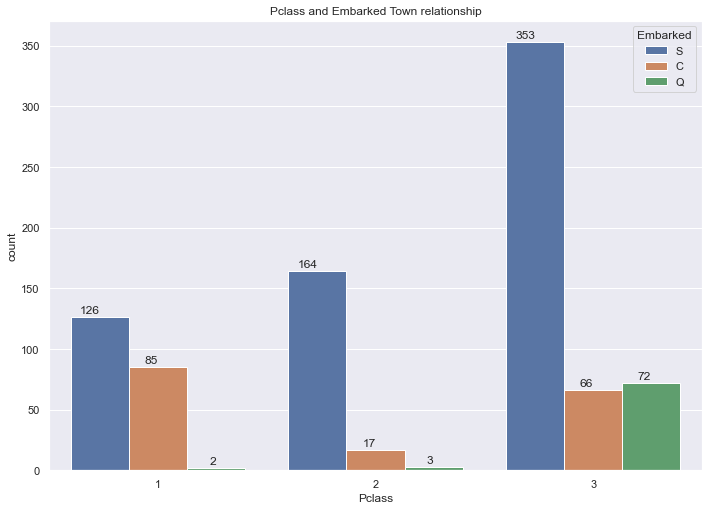

In [11]:
ax = sns.countplot(x="Pclass", data=df,hue="Embarked") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.0f}'.format(height),
            ha="right")
plt.title('Pclass and Embarked Town relationship')
plt.show()

* Ok, so their chances of Embarging from Queenstown are extremely low, given this graph ( Since they are Pclass=1)

### Fare vs Embarked for NaN imputation

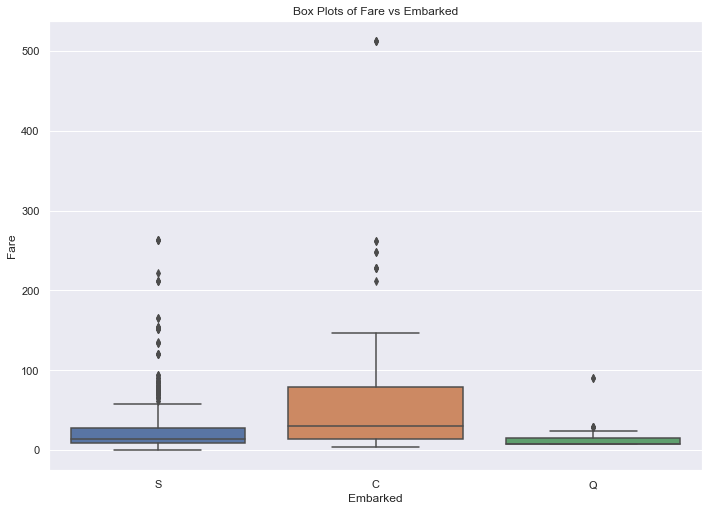

In [12]:
sns.set(style="darkgrid")
sns.boxplot(x='Embarked',y='Fare',data=df)
plt.title('Box Plots of Fare vs Embarked')
plt.show()

* The plot confirms the insuitability of Q for those two cases

* Let's proceed with a final graph on survivability vs Embarked

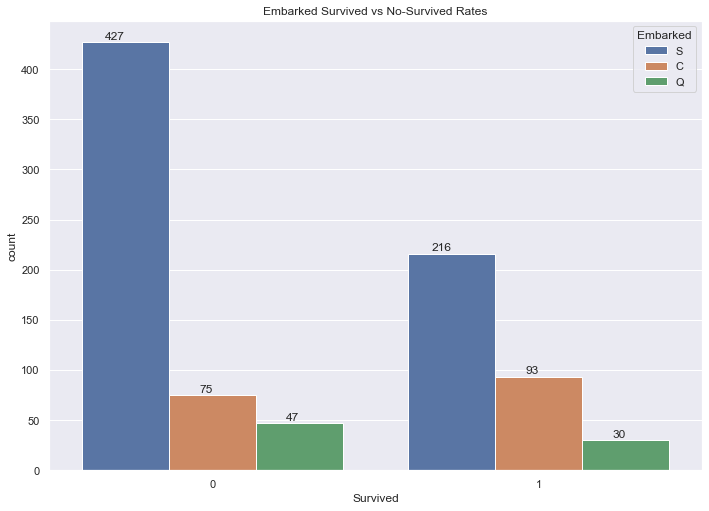

In [13]:
ax = sns.countplot(x="Survived", data=df,hue="Embarked") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.0f}'.format(height),
            ha="right")
plt.title('Embarked Survived vs No-Survived Rates')
plt.show()

* We can see that it is most probable that they embarked from Southampton

* Final Test....We want to see how many people embarked from each territory

In [14]:
df['Embarked'].value_counts()

S    643
C    168
Q     77
Name: Embarked, dtype: int64

* Ok, we conclude...We will impute that those ladies embarked from Southampton. It is the most probable thing to have happened

* 'S' is also the most frequent class, so we impute according to it

In [15]:
df['Embarked'] = df['Embarked'].fillna('S')

* Let us now check our dataset again to confirm that Embarked Class has no missing values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        203 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.7+ KB


In [17]:
df['Embarked'].value_counts()

S    645
C    168
Q     77
Name: Embarked, dtype: int64

### Cabin

* We simply create a value 'U', standing for 'Unknown' for people with missing Cabin values...

In [18]:
df['Cabin'] = df['Cabin'].fillna('U')

* We also extract the deck from the first letter of the Cabin Name

In [19]:
df['Deck'] = [cabin[0].upper() for cabin in df['Cabin']]

* We also drop the 'Cabin' Column

In [20]:
df = df.drop(['Cabin'],axis=1)

* We check our datasets once again

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    float64
 10  Embarked     890 non-null    object 
 11  Deck         890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.7+ KB


In [22]:
df['Deck'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     14
F     13
G      4
T      1
Name: Deck, dtype: int64

* We simply remove PassengerId, since it provides no info

In [23]:
df = df.drop(['PassengerId'],axis=1)

* We just drop the Name Column

In [24]:
df=df.drop(['Name'],axis=1)

* Let's check our dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Ticket    890 non-null    object 
 7   Fare      890 non-null    float64
 8   Embarked  890 non-null    object 
 9   Deck      890 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 108.8+ KB


* We also drop the Ticket column, since it is impossible to keep it as it is

In [26]:
df=df.drop(['Ticket'],axis=1)

* Let's check our dataset one last time

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  890 non-null    object 
 8   Deck      890 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 101.8+ KB


In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,U
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,U
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,U


## Splitting on Numerical and Categorical Features

In [31]:
numericals = df[['Pclass','Age','SibSp','Parch','Fare']]
categoricals = df[['Sex','Embarked','Deck']]

### Getting dummy encoding for categoricals

In [32]:
categorical_dummies = pd.get_dummies(categoricals,drop_first=True)

print(categorical_dummies.head(20))

    Sex_male  Embarked_Q  Embarked_S  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  \
0          1           0           1       0       0       0       0       0   
1          0           0           0       0       1       0       0       0   
2          0           0           1       0       0       0       0       0   
3          0           0           1       0       1       0       0       0   
4          1           0           1       0       0       0       0       0   
5          1           1           0       0       0       0       0       0   
6          1           0           1       0       0       0       1       0   
7          1           0           1       0       0       0       0       0   
8          0           0           1       0       0       0       0       0   
9          0           0           0       0       0       0       0       0   
10         0           0           1       0       0       0       0       0   
11         0           0           1    

### MinMaxScaling numerical features


* Since all our numerical features are positive numbers, it makes sense to use MinMax Scaling here

In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

minmax_scaler = MinMaxScaler(feature_range=(0, 1))
#standard_scaler=StandardScaler()

scaled_numericals_array = minmax_scaler.fit_transform(numericals)

scaled_numericals = pd.DataFrame(scaled_numericals_array,columns=list(numericals.columns))

* Let us now check

In [36]:
scaled_numericals

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.293286,0.125,0.000000,0.014151
1,0.0,0.510737,0.125,0.000000,0.139136
2,1.0,0.347649,0.000,0.000000,0.015469
3,0.0,0.469965,0.125,0.000000,0.103644
4,1.0,0.469965,0.000,0.000000,0.015713
...,...,...,...,...,...
885,0.5,0.361239,0.000,0.000000,0.025374
886,0.0,0.252514,0.000,0.000000,0.058556
887,1.0,0.396963,0.125,0.333333,0.045771
888,0.0,0.347649,0.000,0.000000,0.058556


### Combining the two sets ( categorical and numerical) plus the target

In [47]:
scaled_data = pd.DataFrame(np.hstack((scaled_numericals,categorical_dummies,df['Survived'].to_frame())),columns=list(scaled_numericals.columns)+list(categorical_dummies.columns)+['Survived'])

### Sending to Analysis File

In [49]:
scaled_data.to_csv(r'../step_data/feature_engineering.csv', index = False)